## 파이토치
* 딥러닝 라이브러리가 아니였음
* numpy는 gpu에 안올라감
* 딥러닝이랑 잘 맞아서 딥러닝 라이브러리가 됨
* 텐서 구글 파이 페이스북
* 모든 기업에서 파이토치로 개발함
* 텐서플로 잦은 업데이트와 문법으로 도태 됨
* 동적프로그래밍이 가능함 : 실행 도중에 변수를 바꾸거나 새로운 입력 넣기가 가능함 (텐서플러1.0에선 불가)
* 파이썬의 주요한 환경을 그대로 사용가능 함
* 파이토치는 cuda 빠른 연산이 가능하다
* 빠른 라이브러리 업데이트됨
* 자동화됨 - 미분을 생각안해도 미분을 자동으로 해줌
* 텐서라는 변수를 사용 함
* 파이썬의 array나 list는 gpu 못올라가지만 텐서는 가능
* 텐서들은 앞에 torch를 붙임 (자동으로 잡아줌)

In [3]:
import numpy as np
import torch

In [2]:
mps_device = torch.device("mps")

In [3]:
data_list = [1, 2, 3]
data_array = np.array([1, 2, 3])
data_tensor = torch.tensor([1, 2, 3])

print(type(data_list))   ## 데이터 타입이 다르다
print(type(data_array))
print(type(data_tensor))

<class 'list'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [4]:
data_tensor = torch.tensor([1, 2, 3])    ## int
print(data_tensor.dtype)

data_tensor = torch.tensor([1., 2., 3.,]) ## float
print(data_tensor.dtype)

torch.int64
torch.float32


In [5]:
float_tensor = torch.tensor([1, 2, 3], dtype = torch.float64)
print(float_tensor.dtype)

int_tensor = torch.tensor([1.1, 2.2, 3.8,], dtype = torch.int)
print(int_tensor.dtype)
print(int_tensor)

torch.float64
torch.int32
tensor([1, 2, 3], dtype=torch.int32)


In [6]:
convert_tensor = float_tensor.to(dtype = torch.float32)
print(convert_tensor.dtype)

torch.float32


In [7]:
gpu_tensor = torch.tensor([1, 2, 3], dtype = torch.float32)

In [8]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(Myself, self).__init__() ## 필수항목 super는 부모 초기화, 필요한 네트워크 정의, 변수 정의)

    def forward(self, x): ## 값이 들어오면 x로 처리하면 된다. 

        return 0

## 파이토치 모델
* 모델(network) 구성과 관련된 것 torch.nn에 들어 있음
* linear reg~ 도 네트워크임
* nn.Linear(1,1) 앞이 input size, 뒤가 output size

In [9]:
import torch
import torch.nn as nn
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.l1 = nn.Linear(1,1)

    def forward(self, x):
        out = self.l1(x)

        return out

model = MyModel() ## 두번쨰 forward 실행 됨

hours = torch.FloatTensor([2, 3, 4, 5, 6, 7])    ##[배치, 데이터크기] 배치 -> 메모리에 몇개 씩 올리는지 
print(hours.shape)
hours = hours.view(-1, 1)  ## [6,1] 올려줘야 함  reshape -> view로 사용하면 됨 
print(hours.shape)

print(model(hours)) ## w,b 설정안해도 초기화해서 랜덤으로 들어가서 출력함

torch.Size([6])
torch.Size([6, 1])
tensor([[-1.3180],
        [-2.0552],
        [-2.7925],
        [-3.5297],
        [-4.2670],
        [-5.0042]], grad_fn=<AddmmBackward0>)


In [10]:
import torch.optim as optim
criterion = nn.MSELoss()  ## (x-y)^2의 평균
optimizer = optim.SGD(model.parameters(), lr = 0.01) ## parameter 학습시켜야 할 대상(w,b) (SGD -> Sto ~~ 원래는 다 넣고(-1, 1로 나오면 loss가 없는 것 처럼 보임), 데이터 섞어가면서 나눠서함), 기본보다 frequent 모델 파라미터를 업데이트, 메모리 덜 먹음, 데이터가 많아도 나눠서 하기 떄문에 시간이 덜걸림

In [11]:
h = np.array([2, 3, 4, 5, 6, 7])
s = np.array([25, 49, 42, 57, 72, 68])

hours = torch.FloatTensor(h).view(-1,1)
score = torch.FloatTensor(s).view(-1,1)

num_epochs = 10000

for epoch in range(num_epochs):
    outputs = model(hours)

    optimizer.zero_grad()
    loss = criterion(outputs, score)
    loss.backward()
    optimizer.step()

    if(epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1} / {num_epochs}], Loss: {loss.item():.4f}')

Epoch [100 / 10000], Loss: 50.2609
Epoch [200 / 10000], Loss: 46.4202
Epoch [300 / 10000], Loss: 44.0573
Epoch [400 / 10000], Loss: 42.6036
Epoch [500 / 10000], Loss: 41.7093
Epoch [600 / 10000], Loss: 41.1591
Epoch [700 / 10000], Loss: 40.8206
Epoch [800 / 10000], Loss: 40.6123
Epoch [900 / 10000], Loss: 40.4842
Epoch [1000 / 10000], Loss: 40.4054
Epoch [1100 / 10000], Loss: 40.3569
Epoch [1200 / 10000], Loss: 40.3271
Epoch [1300 / 10000], Loss: 40.3087
Epoch [1400 / 10000], Loss: 40.2974
Epoch [1500 / 10000], Loss: 40.2905
Epoch [1600 / 10000], Loss: 40.2862
Epoch [1700 / 10000], Loss: 40.2836
Epoch [1800 / 10000], Loss: 40.2819
Epoch [1900 / 10000], Loss: 40.2810
Epoch [2000 / 10000], Loss: 40.2804
Epoch [2100 / 10000], Loss: 40.2800
Epoch [2200 / 10000], Loss: 40.2797
Epoch [2300 / 10000], Loss: 40.2796
Epoch [2400 / 10000], Loss: 40.2795
Epoch [2500 / 10000], Loss: 40.2795
Epoch [2600 / 10000], Loss: 40.2794
Epoch [2700 / 10000], Loss: 40.2794
Epoch [2800 / 10000], Loss: 40.2794
E

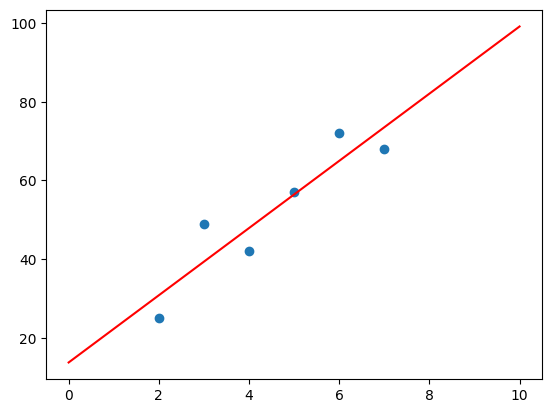

In [12]:
import matplotlib.pyplot as plt

plt.plot(h, s, 'o')

x = torch.linspace(0, 10, 10)
predict = model(x.view(-1, 1))
predict = predict.detach().numpy() ## detach -> 원래 자동미분기가 있는데 없애고 텐서로 바꾸고 돌림
plt.plot(x.numpy(), predict, 'r')

plt.show()

In [13]:
import torch
import torch.nn as nn
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.l1 = nn.Linear(1,1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        out = self.l1(x)
        out = self.activation(out)
        return out

model = MyModel() ## 두번쨰 forward 실행 됨

hours = torch.FloatTensor([10, 7, 5, 4]).view(-1,1)    ##[배치, 데이터크기] 배치 -> 메모리에 몇개 씩 올리는지 

print(model(hours)) ## w,b 설정안해도 초기화해서 랜덤으로 들어가서 출력함

tensor([[0.9999],
        [0.9981],
        [0.9892],
        [0.9741]], grad_fn=<SigmoidBackward0>)


In [14]:
import torch.optim as optim
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)
h = np.array([10, 7, 5, 4])
s = np.array([1, 1, 0, 0])
hours = torch.FloatTensor(h).view(-1,1)
score = torch.FloatTensor(s).view(-1,1)
num_epochs = 20000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(hours)
    loss = criterion(outputs, score)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/20000], Loss: 0.5634
Epoch [200/20000], Loss: 0.4998
Epoch [300/20000], Loss: 0.4494
Epoch [400/20000], Loss: 0.4089
Epoch [500/20000], Loss: 0.3758
Epoch [600/20000], Loss: 0.3483
Epoch [700/20000], Loss: 0.3252
Epoch [800/20000], Loss: 0.3054
Epoch [900/20000], Loss: 0.2883
Epoch [1000/20000], Loss: 0.2734
Epoch [1100/20000], Loss: 0.2603
Epoch [1200/20000], Loss: 0.2485
Epoch [1300/20000], Loss: 0.2380
Epoch [1400/20000], Loss: 0.2285
Epoch [1500/20000], Loss: 0.2198
Epoch [1600/20000], Loss: 0.2119
Epoch [1700/20000], Loss: 0.2047
Epoch [1800/20000], Loss: 0.1979
Epoch [1900/20000], Loss: 0.1917
Epoch [2000/20000], Loss: 0.1859
Epoch [2100/20000], Loss: 0.1805
Epoch [2200/20000], Loss: 0.1755
Epoch [2300/20000], Loss: 0.1707
Epoch [2400/20000], Loss: 0.1663
Epoch [2500/20000], Loss: 0.1621
Epoch [2600/20000], Loss: 0.1581
Epoch [2700/20000], Loss: 0.1543
Epoch [2800/20000], Loss: 0.1508
Epoch [2900/20000], Loss: 0.1474
Epoch [3000/20000], Loss: 0.1441
Epoch [3100/20000],

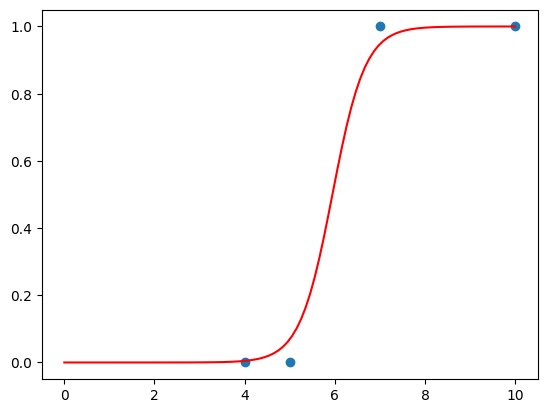

In [15]:
# evaluation
import matplotlib.pyplot as plt
model.eval()
plt.plot(h, s, 'o')
x = torch.linspace(0, 10, 100)
predict = model(x.view(-1,1))
predict = predict.detach().numpy()
plt.plot(x.numpy(), predict, 'r')
plt.show()

In [16]:
## F 공부하기

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class XOR_Model(nn.Module):
    def __init__(self):
        super(XOR_Model, self).__init__()
        self.l1 = nn.Linear(2, 8)
        self.l2 = nn.Linear(8, 4)
        self.l3 = nn.Linear(4, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        out = self.l1(x)
        out = self.activation(out)
        out = self.activation(self.l2(out))
        out = F.sigmoid(self.l3(out))
        
        return out

model = XOR_Model() ## 두번쨰 forward 실행 됨

In [31]:
import torch.optim as optim
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])
x_t = torch.FloatTensor(x).view(x.shape[0],-1)
y_t = torch.FloatTensor(y).view(x.shape[0],1)


num_epochs = 20000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_t)
    loss = criterion(outputs, y_t)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
predict = model(x_t)
print(predict)

Epoch [100/20000], Loss: 0.6931
Epoch [200/20000], Loss: 0.6931
Epoch [300/20000], Loss: 0.6931
Epoch [400/20000], Loss: 0.6931
Epoch [500/20000], Loss: 0.6931
Epoch [600/20000], Loss: 0.6931
Epoch [700/20000], Loss: 0.6931
Epoch [800/20000], Loss: 0.6931
Epoch [900/20000], Loss: 0.6931
Epoch [1000/20000], Loss: 0.6931
Epoch [1100/20000], Loss: 0.6931
Epoch [1200/20000], Loss: 0.6930
Epoch [1300/20000], Loss: 0.6930
Epoch [1400/20000], Loss: 0.6930
Epoch [1500/20000], Loss: 0.6930
Epoch [1600/20000], Loss: 0.6930
Epoch [1700/20000], Loss: 0.6930
Epoch [1800/20000], Loss: 0.6930
Epoch [1900/20000], Loss: 0.6930
Epoch [2000/20000], Loss: 0.6930
Epoch [2100/20000], Loss: 0.6930
Epoch [2200/20000], Loss: 0.6930
Epoch [2300/20000], Loss: 0.6930
Epoch [2400/20000], Loss: 0.6929
Epoch [2500/20000], Loss: 0.6929
Epoch [2600/20000], Loss: 0.6929
Epoch [2700/20000], Loss: 0.6929
Epoch [2800/20000], Loss: 0.6929
Epoch [2900/20000], Loss: 0.6929
Epoch [3000/20000], Loss: 0.6929
Epoch [3100/20000],

In [208]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                    [93, 88, 93],
                    [89, 91, 90],
                    [96, 98, 100],
                    [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    def __len__(self):
        return len(self.x_data)
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y
dataset = CustomDataset()

In [209]:
from torch.utils.data import DataLoader
dataset = CustomDataset()
dataloader = DataLoader(dataset,
                        batch_size=2,
                        shuffle=True)
data,label= next(iter(dataloader))
print(data.shape)
print(data)

print(label.shape)
print(label)

torch.Size([2, 3])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
torch.Size([2, 1])
tensor([[142.],
        [152.]])


In [210]:
import torch
import torch.nn as nn
import torch.optim as optim

In [211]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [212]:
# 입력 -> 1by4
print(X.dtype)
print(y.dtype)
print(X.shape)
print(y.shape)

float64
int64
(150, 4)
(150,)


In [213]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [214]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [216]:
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.long)
y_test_tensor = torch.tensor(y_test, dtype = torch.long)

In [217]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = 16, shuffle=False)

In [218]:
x_in, y_out = next(iter(train_loader))

In [219]:
print(x_in.shape)
print(y_out.shape)

torch.Size([16, 4])
torch.Size([16])


In [220]:
import torch.nn.functional as F

class myModel(nn.Module): ## nn.모델 상속
    def __init__(self):
        super(myModel, self).__init__() ## 상속 받은 거 초기화
        self.fc1 = nn.Linear(4, 100)    ## 입력의 크기 4, 아웃풋 100개
        self.fc2 = nn.Linear(100, 3)    ## 출력받은 100개를 입력으로 넣고 3개로 출력
        # self.act = nn.Sigmoid() 

    
    def forward(self, x):
        x = F.sigmoid(self.fc1(x)) ## 활성화 함수  미리 정하지 않았는데 쓰고  싶은 경우
        # self.act(self.fc1(x))
        x = self.fc2(x)
        # x = F.softmax.fc2(x) 이렇게 불가능함 
        return x

In [221]:
model = myModel()
print(model)

myModel(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=3, bias=True)
)


In [222]:
model = myModel()

from torchsummary import summary
summary(model, (1,4), device = 'cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]             500
            Linear-2                 [-1, 1, 3]             303
Total params: 803
Trainable params: 803
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [223]:
criterion = nn.CrossEntropyLoss()  ## softmax 함수가 구현되어져 있음 함수짤때 생각
optimizer = optim.SGD(model.parameters(), lr = 0.001) ## 

In [224]:
num_epochs = 500

for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:

        outputs = model(X_batch)

        optimizer.zero_grad()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 10, Loss: 1.0768057107925415
Epoch 20, Loss: 1.0456739664077759
Epoch 30, Loss: 1.053147315979004
Epoch 40, Loss: 1.0311355590820312
Epoch 50, Loss: 1.0503257513046265
Epoch 60, Loss: 1.0057786703109741
Epoch 70, Loss: 0.9998794198036194
Epoch 80, Loss: 0.9615100622177124
Epoch 90, Loss: 0.9752808809280396
Epoch 100, Loss: 0.9790101647377014
Epoch 110, Loss: 0.9337720274925232
Epoch 120, Loss: 0.9201556444168091
Epoch 130, Loss: 0.9183594584465027
Epoch 140, Loss: 0.9998905062675476
Epoch 150, Loss: 0.8582054972648621
Epoch 160, Loss: 0.8899263143539429
Epoch 170, Loss: 0.8471554517745972
Epoch 180, Loss: 0.8247213363647461
Epoch 190, Loss: 0.9202734231948853
Epoch 200, Loss: 0.9115082621574402
Epoch 210, Loss: 0.7493004202842712
Epoch 220, Loss: 0.8548351526260376
Epoch 230, Loss: 0.7276009321212769
Epoch 240, Loss: 0.7293468117713928
Epoch 250, Loss: 0.8916587829589844
Epoch 260, Loss: 0.750939130783081
Epoch 270, Loss: 0.779137134552002
Epoch 280, Loss: 0.8713021874427795
Epoc

In [225]:
from tqdm import tqdm
num_epochs = 100

for epoch in range(num_epochs):
    for i, (X_batch, y_batch) in enumerate(tqdm(train_loader)): ## 사진 참고하기

        outputs = model(X_batch)

        optimizer.zero_grad()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2371.00it/s]


Epoch 10, Loss: 0.6947660446166992


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2613.48it/s]


Epoch 20, Loss: 0.6143776774406433


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2354.37it/s]


Epoch 30, Loss: 0.7531804442405701


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2832.55it/s]


Epoch 40, Loss: 0.6068188548088074


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2392.98it/s]


Epoch 50, Loss: 0.5703808069229126


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3053.46it/s]


Epoch 60, Loss: 0.4912736117839813


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3175.70it/s]


Epoch 70, Loss: 0.6158742904663086


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2867.41it/s]


Epoch 80, Loss: 0.707990825176239


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2416.77it/s]


Epoch 90, Loss: 0.5508973598480225


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3031.66it/s]

Epoch 100, Loss: 0.488571435213089


In [226]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    print(f'Auccuracy: {100 * correct / total}%')

Auccuracy: 90.0%
